## Here is the code for analysis of components of hydrogen on different timesteps (reviewed and edited by Nikita)

In [1]:
import numpy as np
import plotly as ply
import plotly.graph_objs as go

In [2]:
def sortarg(it): #custom sortkey
    return int(it[0].split()[0])

### Yegor's function for grouping the nearby particles: 

In [3]:
def read(filename, r):
    with open(filename) as f:
        lines = f.readlines()
    data=[]
    for k in lines:
        if len(k) > 15:
            d=[]
            d.append(k)
            for m in lines:
                if k!=m and len(m) > 15 and (float(m.split()[3])-float(k.split()[3]))**2+(float(m.split()[4])-float(k.split()[4]))**2+(float(m.split()[2])-float(k.split()[2]))**2 <= r**2:
                    d.append(m)
            data.append(d)
    data.sort(key=sortarg)
    return data

### Alexander's function for analysis of bonded particles:

In [4]:
def calculate(mydata, mydata2):
    quantity_E=0 #количество электронов
    quantity_Hp=0 #количество ионов водорода
    quantity_H1=0 #количество H1
    quantity_H2=0 #количество H2
    quantity_N=0 #количество неопределенных атомов
    for i in range (len(mydata)):
        N=0
        for j in range (len(mydata[i])):
    
            N+=int(mydata[i][j].split()[1])
        if N==6 and len(mydata[i])==4:
            quantity_H2+=1
        elif N==3 and len(mydata[i])==2:
            quantity_H1+=1
        elif N==1:
            quantity_Hp+=1
        elif N==2 and len(mydata[i])==1:
            quantity_E+=1
        elif N==6 and len(mydata2[i])==4:
            quantity_H2+=1
    quantity_N=2000-quantity_Hp-quantity_E-quantity_H1-quantity_H2          
    
    return quantity_H2, quantity_Hp, quantity_E, quantity_H1, quantity_N

### Vika's function for plot making:

In [7]:
def make_concentrations_arrays(N=2283000, step=100000):
    i = 1000
    h2 = []
    hp = []
    em = []
    h = []
    dfc = []
    
    folder_num = 0
    while i <= N:
        if (i >= folder_num + 1000000):
            folder_num += 1000000
        data1 = "timesteps_tables_" + str(folder_num) + "/" + str(i) + ".txt"
        
        if (i+step >= folder_num + 1000000):
            folder_num += 1000000
        if (i+step > N):
            return h2, hp, em, h, dfc
        
        data2 = "timesteps_tables_" + str(folder_num) + "/" + str(i+step) + ".txt"
        comps = calculate(read(data1, 2), read(data2, 2))
        h2.append(comps[0])
        hp.append(comps[1])
        em.append(comps[2])
        h.append(comps[3])
        dfc.append(comps[4])
        print("done:", i)
        
        i += step
    
    return h2, hp, em, h, dfc

In [8]:
h2, hp, em, h, dfc = make_concentrations_arrays()
print("done with everything")

done: 1000
done: 101000
done: 201000
done: 301000
done: 401000
done: 501000
done: 601000
done: 701000
done: 801000
done: 901000
done: 1001000
done: 1101000
done: 1201000
done: 1301000
done: 1401000
done: 1501000
done: 1601000
done: 1701000
done: 1801000
done: 1901000
done: 2001000
done: 2101000
done with everything


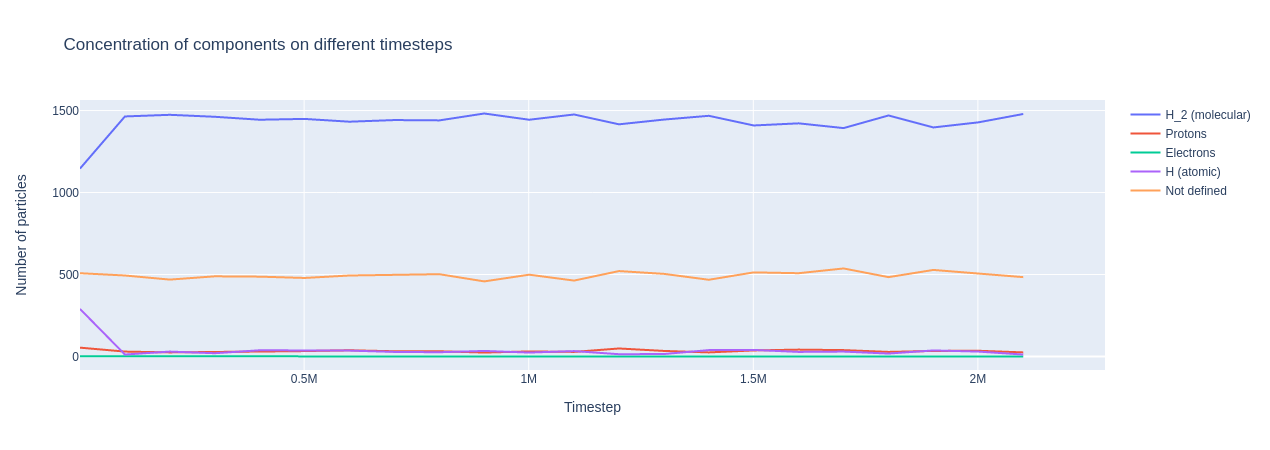

In [17]:
N = 2283000
step = 100000
timesteps = np.arange(1000, 2101001, step)

fig = go.Figure()

fig.update_layout(title="Concentration of components on different timesteps")
fig.update_yaxes(title="Number of particles")
fig.update_xaxes(range=[1000, N], title="Timestep")
fig.add_trace(go.Scatter(x=timesteps, y=h2, name="H_2 (molecular)"))
fig.add_trace(go.Scatter(x=timesteps, y=hp, name="Protons"))
fig.add_trace(go.Scatter(x=timesteps, y=em, name="Electrons"))
fig.add_trace(go.Scatter(x=timesteps, y=h, name="H (atomic)"))
fig.add_trace(go.Scatter(x=timesteps, y=dfc, name="Not defined"))

fig.show()